In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [2]:
d = pd.read_csv(r'C:\Users\user\Downloads\C9_Data.csv')
d

,row_id,user_id,timestamp,gate_id
0,0,18,2022-07-29 09:08:54,7
1,1,18,2022-07-29 09:09:54,9
2,2,18,2022-07-29 09:09:54,9
3,3,18,2022-07-29 09:10:06,5
4,4,18,2022-07-29 09:10:08,5
...,...,...,...,...
37513,37513,6,2022-12-31 20:38:56,11
37514,37514,6,2022-12-31 20:39:22,6
37515,37515,6,2022-12-31 20:39:23,6
37516,37516,6,2022-12-31 20:39:31,9


In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37518 entries, 0 to 37517
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   row_id     37518 non-null  int64 
 1   user_id    37518 non-null  int64 
 2   timestamp  37518 non-null  object
 3   gate_id    37518 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ MB


In [4]:
d['gate_id'].value_counts()

 4     8170
 3     5351
 10    4767
 5     4619
 11    4090
 9     3390
 7     3026
 6     1800
 13    1201
 12     698
 15     298
-1       48
 8       48
 1        5
 16       4
 0        2
 14       1
Name: gate_id, dtype: int64

In [5]:
x = d.drop('gate_id',axis=1)
y=d['gate_id']

In [6]:
d.columns

Index(['row_id', 'user_id', 'timestamp', 'gate_id'], dtype='object')

In [7]:
d1 = d[['row_id','user_id','gate_id']]
d1

,row_id,user_id,gate_id
0,0,18,7
1,1,18,9
2,2,18,9
3,3,18,5
4,4,18,5
...,...,...,...
37513,37513,6,11
37514,37514,6,6
37515,37515,6,6
37516,37516,6,9


In [8]:
d2 = d1.fillna(0)

In [9]:
x = d2[['row_id','user_id']]
y = d2['gate_id']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.70)

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [14]:
parameters = {
    'max_depth':[10,20,50,60,30],
    'min_samples_leaf':[35,16,75,70,45],
    'n_estimators':[10,20,30,40,50]
}

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
grid_search = GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 50, 60, 30],
                         'min_samples_leaf': [35, 16, 75, 70, 45],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [17]:
grid_search.best_score_

0.22915238748000916

In [18]:
from sklearn.tree import plot_tree

In [19]:
rfc_best= grid_search.best_estimator_

IndexError: list index out of range

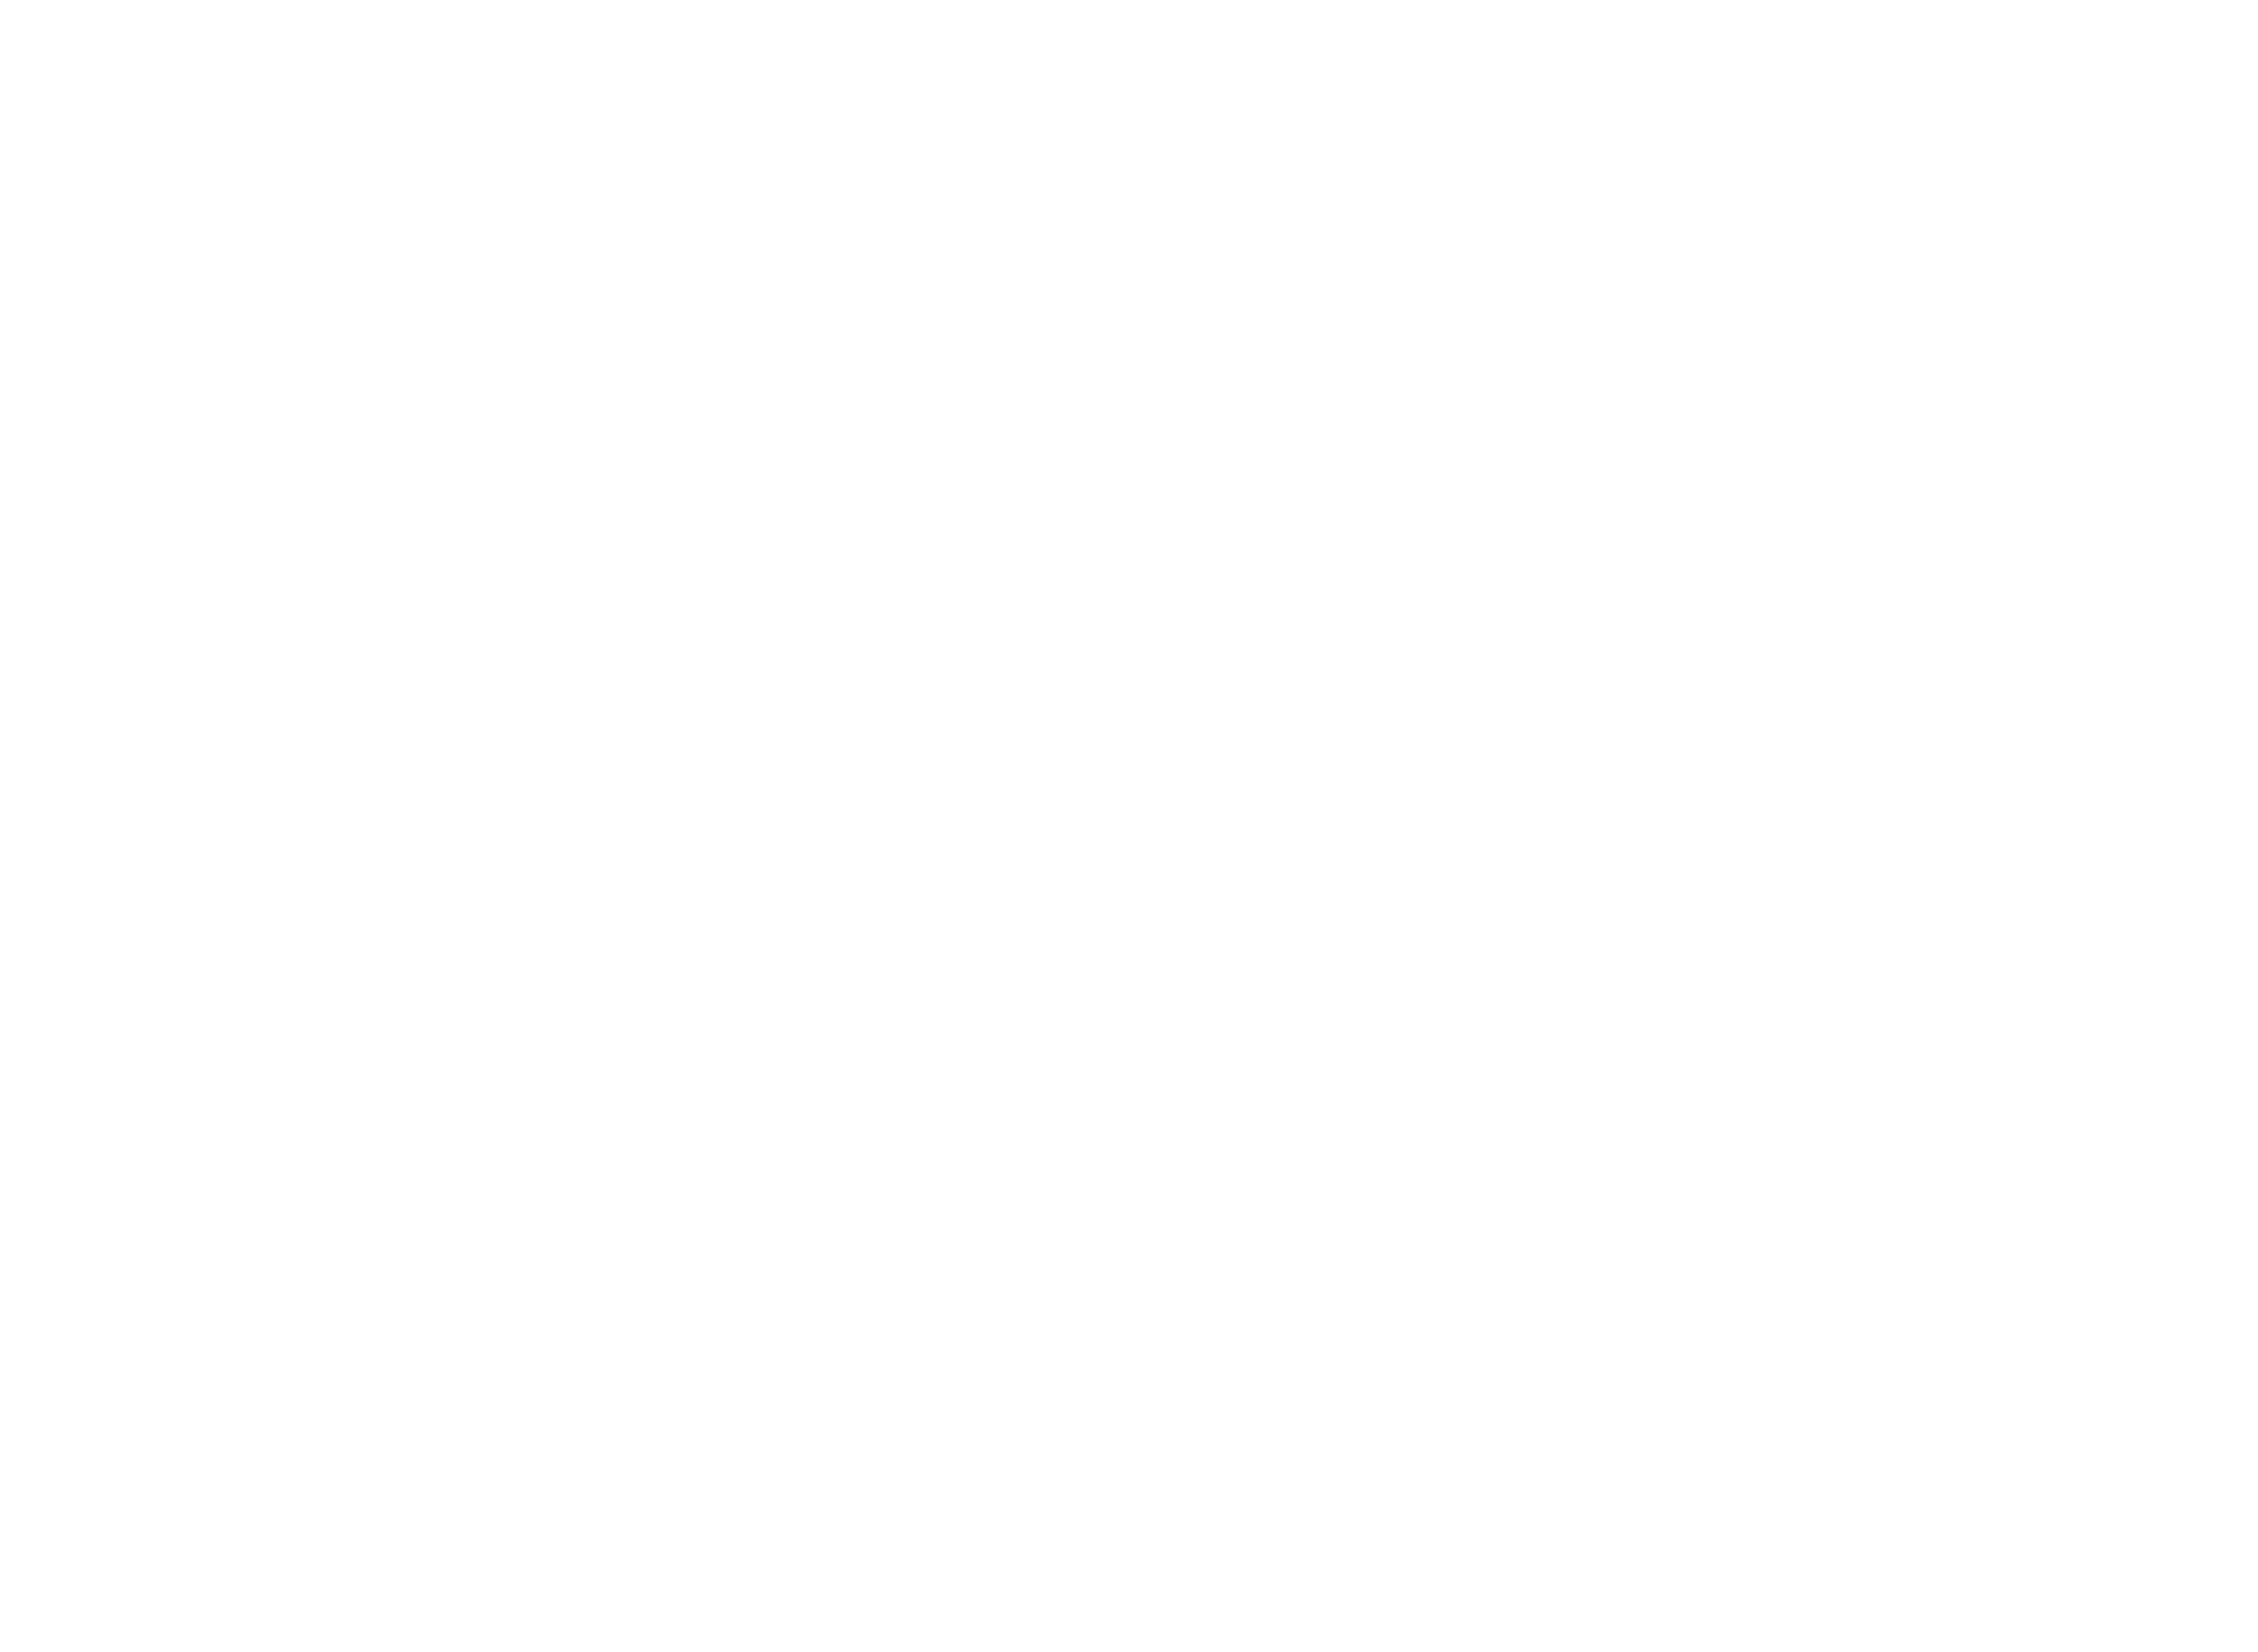

In [20]:
plt.figure(figsize=(80,60))
plot_tree(rfc_best.estimators_[5],feature_names=x.columns,class_names=["","No"],filled=True)